In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
from leicaexperiment import Experiment
from leicaexperiment.experiment import attributes, attribute
from skimage import io, filters, morphology
import numpy as np

In [40]:
path = r'D:\MatrixScreenerImages\3.3.0_9757'
path += '\\'
e = Experiment(path + 'experiment--2015_04_29_16_35_42 - Copy')

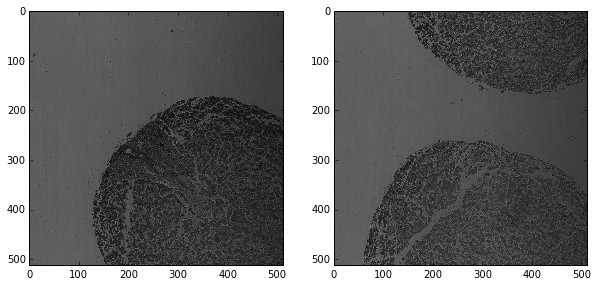

In [43]:
p1 = e.image(0,0,0,0)
p2 = e.image(0,0,0,1)
img1 = io.imread(p1)
img2 = io.imread(p2)
plt.figure(figsize=(10,5))
plt.subplot(121)
io.imshow(img1)
plt.subplot(122)
io.imshow(img2);

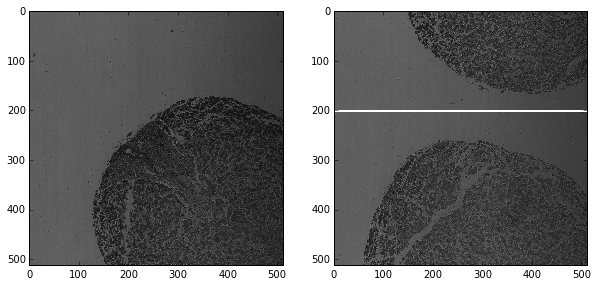

In [44]:
img1 = io.imread(p1)
line_variance = np.std(img1, axis=1)
min_line = np.argmin(line_variance)
img1[min_line-2:min_line+2, :] = 255

img2 = io.imread(p2)
line_variance = np.std(img2, axis=1)
min_line = np.argmin(line_variance)
img2[min_line-2:min_line+2, :] = 255


plt.figure(figsize=(10,5))
plt.subplot(121)
io.imshow(img1)
plt.subplot(122)
io.imshow(img2);

In [45]:
img1 = io.imread(p1)
line_variance = np.std(img1, axis=1)
min_line = np.argmin(line_variance)
img1[min_line-2:min_line+2, :] = 255

In [46]:
min_line

3

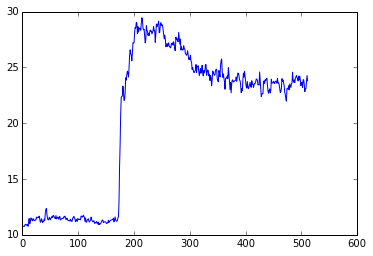

In [47]:
plt.plot(line_variance)

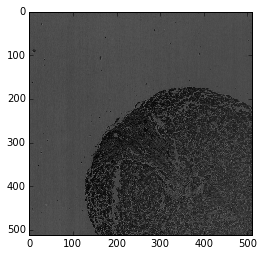

In [49]:
img1 = io.imread(e.image(0,0,0,0))
selem = morphology.square(10)
smooth = filters.rank.median(img1, selem)
equalized = np.copy(img1.astype(np.int))
equalized -= smooth[min_line,:]
equalized -= equalized.min()
io.imshow(equalized.astype(np.uint8));

In [50]:
def find_smooth_line(filename):
    "Find smoothest line in image. Returns the smooth line."
    img = io.imread(filename)

    line_variance = np.std(img, axis=1)
    if line_variance.min() < 15:
        # found smooth line
        line_number = np.argmin(line_variance)
        return img[line_number,:]

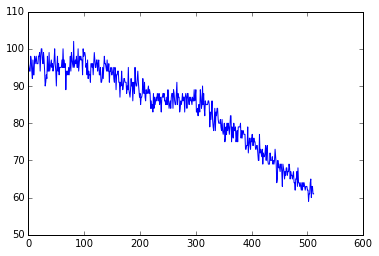

In [51]:
intensity_profile = find_smooth_line(e.image(0,0,0,0))
plt.plot(intensity_profile)

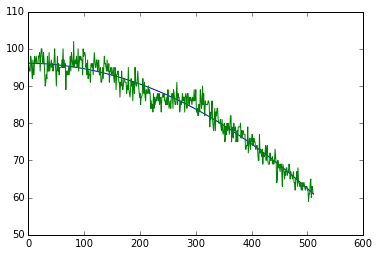

In [52]:
# use curve fit to avoid noise
from scipy.optimize import curve_fit

def line(x,a,b,c):
    return a*x**2+b*x+c

x = np.arange(512)
options, covariance = curve_fit(line, x, intensity_profile)
a,b,c = options

y = a*x**2+b*x+c
plt.plot(y)
plt.plot(intensity_profile)

In [53]:
def remove_intensity_variation(filename, intensity_profile):
    "Subtracts intensity_profile from image file, to reduce intensity variation."
    from skimage import io
    import numpy as np

    img = io.imread(filename).astype(np.int)

    img -= intensity_profile
    # clip values to avoid overflows
    img[img < 0] = 0
    img[img > 255] = 255

    io.imsave(filename, img.astype(np.uint8))

In [54]:
img1 = io.imread(p1)

In [55]:
minimum = int((img1-y).min())
minimum

-78

In [56]:
y = y + minimum

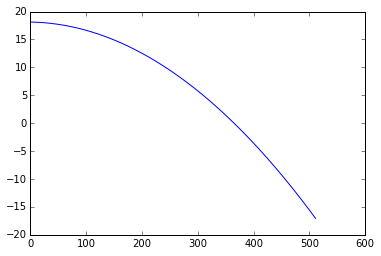

In [57]:
plt.plot(y)

In [58]:
for i in e.images:
    remove_intensity_variation(i, y)

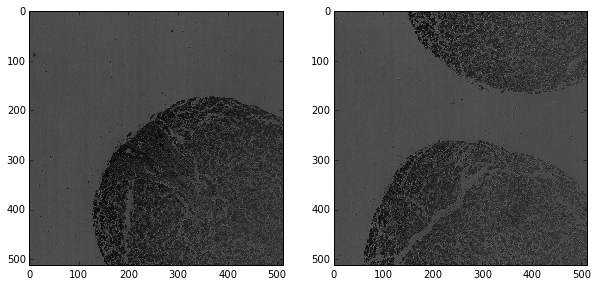

In [59]:
plt.figure(figsize=(10,5))
plt.subplot(121)
io.imshow(p1)
plt.subplot(122)
io.imshow(p2);